<a href="https://colab.research.google.com/github/bandreibal/autoencoders/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AutoEncoder con Keras

En este notebook vamos a ver cómo podemos implementar un autoencoder paso a paso. Todos los ejemplos están extraídos del propio blog de Keras, aquí tenéis el [enlace](https://blog.keras.io/building-autoencoders-in-keras.html) para su consulta.

Comenzemos recordando qué es un autoencoder. Para ello, mirad la imagen siguiente:

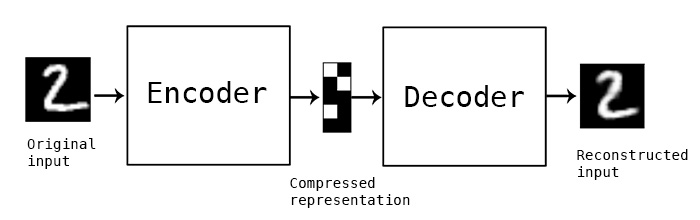

En ella podemos observar como consta de dos bloques: el encoder y el decoder.

Por una parte, el **encoder** toma los datos de entrada y los comprime en una representación mucho más compacta.

Por la otra, el **decoder** coge esa representación (o codificación) comprimida y trata de reconstruir los datos originales con el menor error posible.

AutoEncoder más simple posible:

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2757 - val_loss: 0.1923
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1723 - val_loss: 0.1547
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1444 - val_loss: 0.1325
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1272 - val_loss: 0.1197
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1167 - val_loss: 0.1113
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1098 - val_loss: 0.1058
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1052 - val_loss: 0.1018
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0994 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.0957

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


In [9]:
encoded_imgs.shape

(10000, 32)

Ahora vamos a mostrar la imagen y el código latente correspondiente:

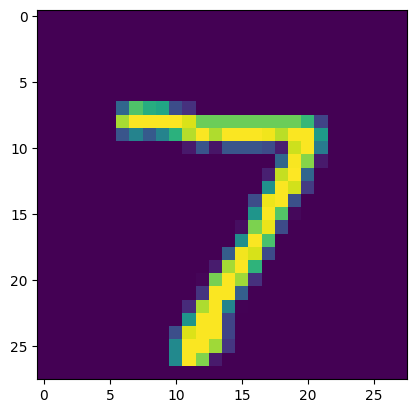

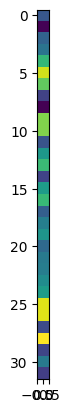

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28, 28)), plt.show()
plt.imshow(np.expand_dims(encoded_imgs[0, :], -1))

Y ahora la imagen reconstruída a partir de ese código latente:

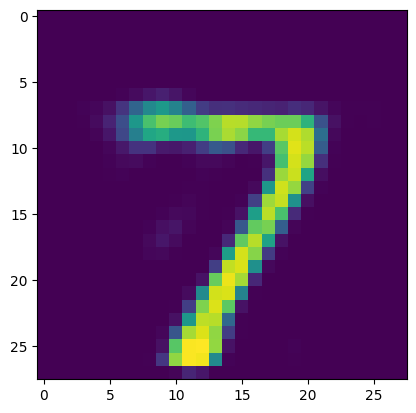

(<matplotlib.image.AxesImage at 0x7b5b500e3820>, None)

In [11]:
plt.imshow(decoded_imgs[0].reshape(28, 28)), plt.show()

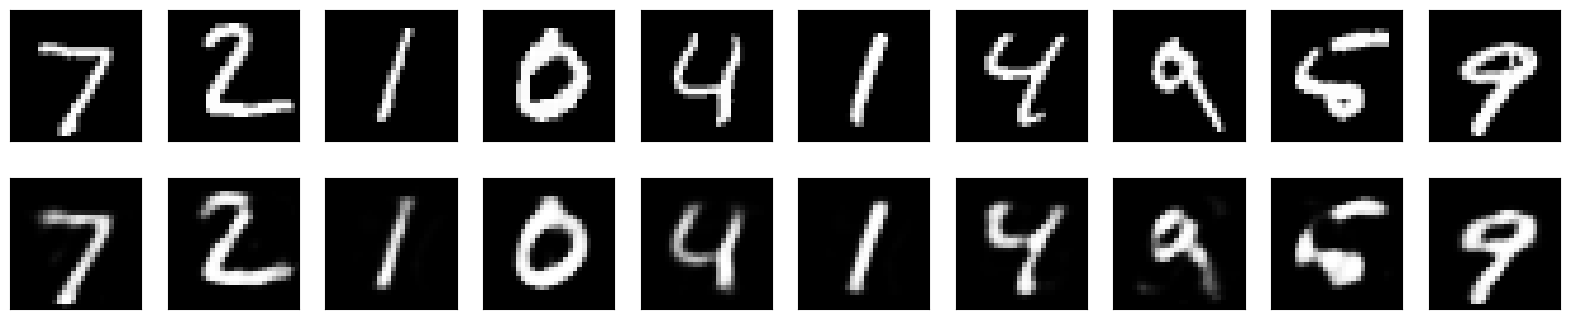

In [12]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Además, tal y como vimos en el video de Geoffrey Hinton "[From PCA to autoencoders](https://www.youtube.com/watch?v=PSOt7u8u23w)", lo que está ocurriendo es que el autoencoder está calculando una representación comprimida de los datos (lo que obtenemos a la salida del encoder) que no es otra cosa que una aproximación a lo que obtendríamos si aplicásemos una PCA.

**Deep** autoencoder

In [13]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [14]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2443 - val_loss: 0.1637
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1475 - val_loss: 0.1351
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1304 - val_loss: 0.1230
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1203 - val_loss: 0.1152
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1140 - val_loss: 0.1103
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1101 - val_loss: 0.1069
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1070 - val_loss: 0.1042
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1042 - val_loss: 0.1022
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1022 - val_loss: 0.1007
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1006 - val_loss: 0.0997

313/313 [==============================] - 0s 1ms/step


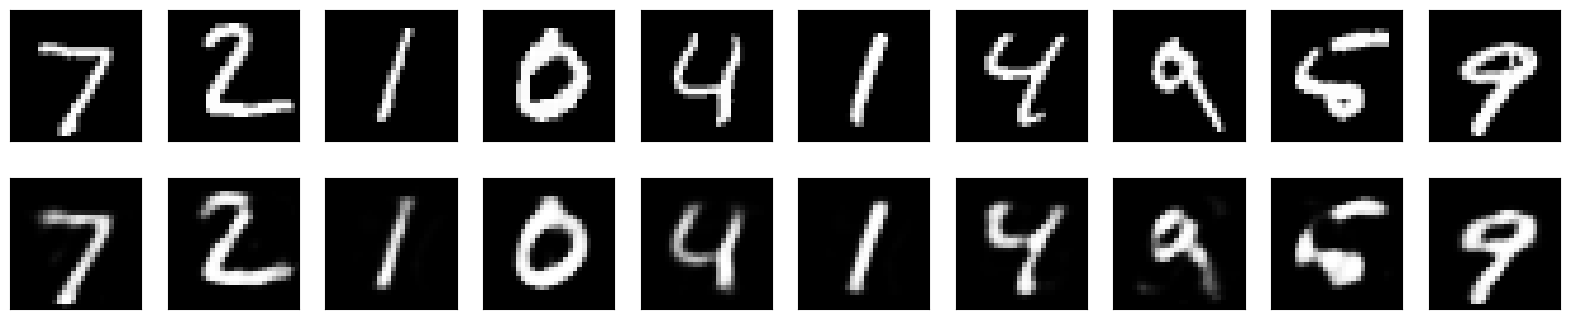

In [15]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Las pérdidas que obtenemos ahora son un poco mejores: de ~0.09 que obteníamos antes en validación, a ~0.08.

**Convolutionales** layers:

In [16]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Como vamos a trabajar con imágenes, tenemos que redimensionar los datos para que tengan 2 dimensiones: de 786 a (28, 28, 1), porque son imágenes en escala de grises.

Además, normalizaremos las imágenes entre 0 y 1: dividiremos entre 255, ya que las imágenes están codificadas con 8 bits sin signo (uint8).

In [17]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Tras esto, entrenamos nuestro DC (Deep Convolutional) AutoEncoder:

In [18]:
logs = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 9s 10ms/step - loss: 0.2158 - val_loss: 0.1504
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1391 - val_loss: 0.1288
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1245 - val_loss: 0.1186
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1164 - val_loss: 0.1122
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1116 - val_loss: 0.1086
Epoch 6/50
469/469 [==============================] - 5s 12ms/step - loss: 0.1086 - val_loss: 0.1066
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1066 - val_loss: 0.1046
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1051 - val_loss: 0.1036
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1039 - val_loss: 0.1022
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1029 - val_loss: 0.

También podemos visualizar las curvas de entrenamiento:

In [19]:
logs.history.keys()

dict_keys(['loss', 'val_loss'])

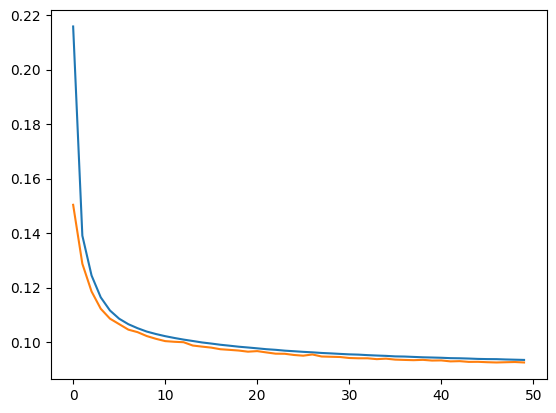

In [20]:
import matplotlib.pyplot as plt

plt.plot(logs.history['loss'])
plt.plot(logs.history['val_loss'])

313/313 [==============================] - 1s 2ms/step


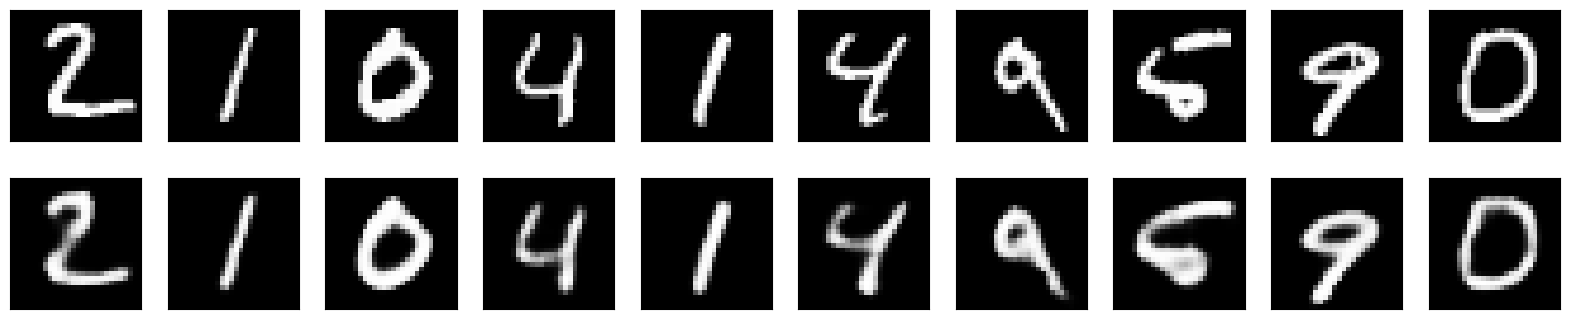

In [21]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Además, podemos también mirar las representaciones obtenidas por el encoder, las cuales tienen unas dimensiones de 8x8x4.

Para poder visualizarlas en 2D, las redimensionaremos a 4x32.

313/313 [==============================] - 1s 2ms/step


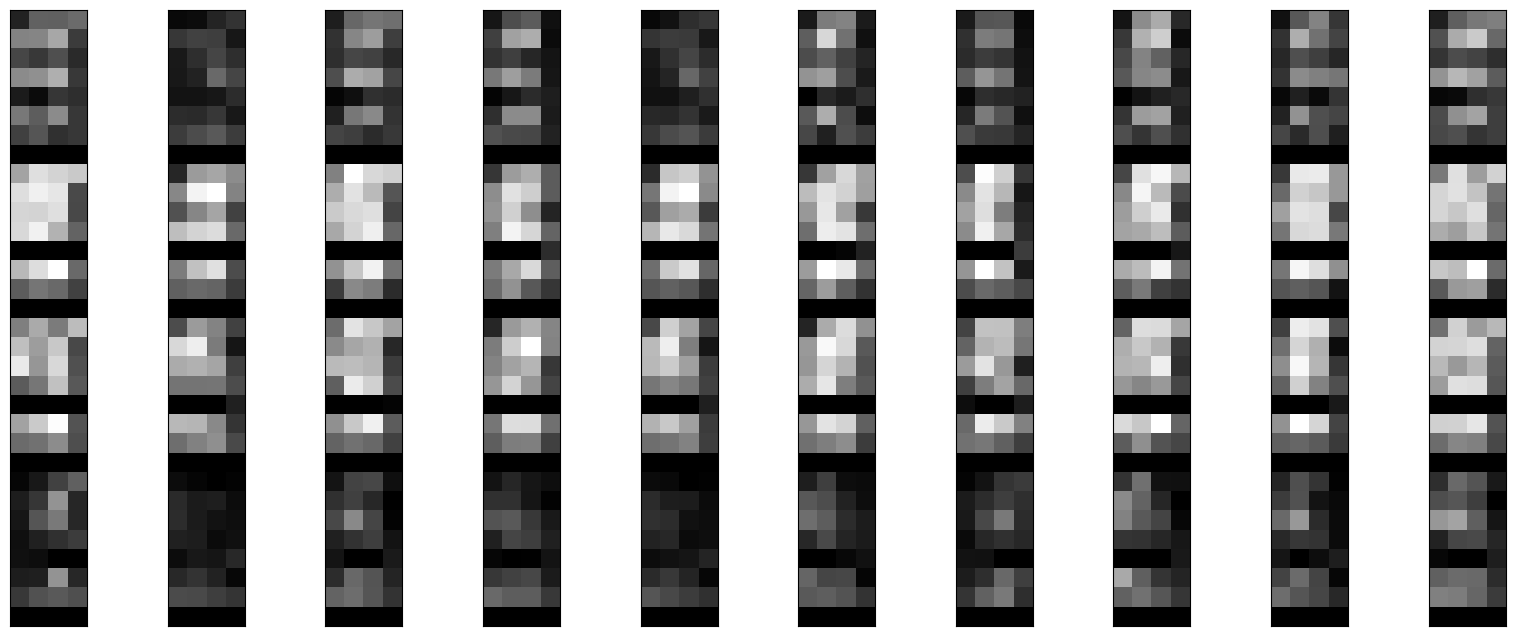

In [22]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En teoría, en estas representaciones se encuentra la información necesaria para reconstruir los datos originales con el menor error posible.

Vamos a generar ruido sintético en nuestras imágenes y a tratar de eliminarlo con nuestro modelo.

**Reducción de ruido en imágenes**:

In [23]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Veamos qué es lo que hemos hecho:

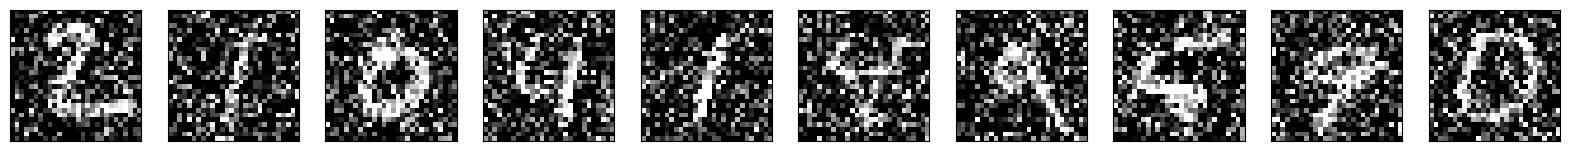

In [24]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En efecto, hemos añadido una cantidad de ruido considerable. Vamos a intentar eliminarlo con un autoencoder convolucional:

In [25]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

logs = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.1692 - val_loss: 0.1167
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1129 - val_loss: 0.1084
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1072 - val_loss: 0.1044
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1045 - val_loss: 0.1023
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1025 - val_loss: 0.1008
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1011 - val_loss: 0.0997
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1001 - val_loss: 0.0997
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0994 - val_loss: 0.0982
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0987 - val_loss: 0.0977
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0982 - val_loss: 0.0973

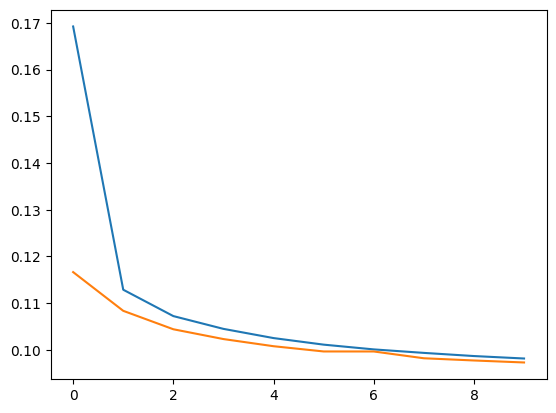

In [26]:
plt.plot(logs.history['loss'])
plt.plot(logs.history['val_loss'])

Visualicemos ahora los resultados:

313/313 [==============================] - 1s 2ms/step


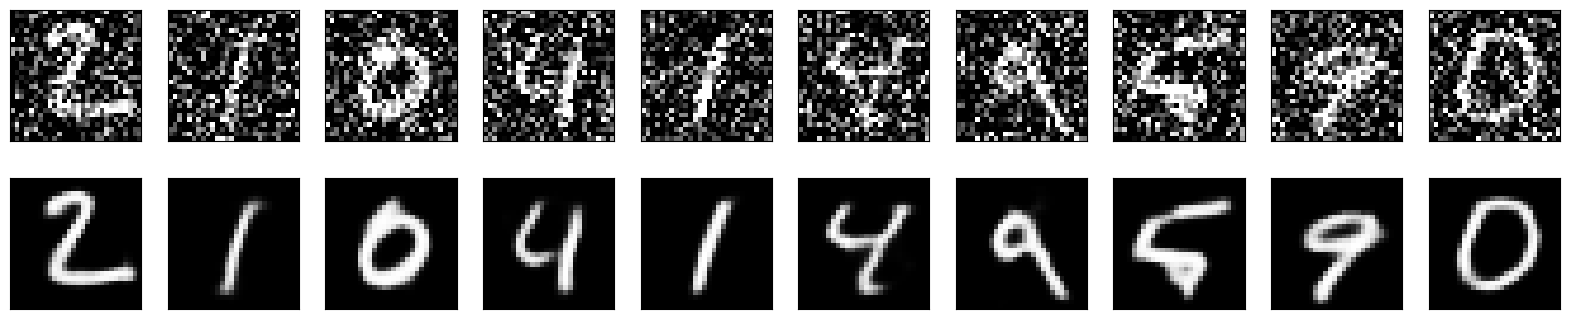

In [27]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
